# Pulsed NMR Individual Analysis

Use this template to carry out the analysis tasks for the Noise experiment.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

There is no need to calculate uncertainties for this analysis.  The goals here are only to see and understand general trends.  You may want to use the [LMFit](https://lmfit.github.io/lmfit-py/) package.

In [207]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as const
import scipy.stats as stat
from scipy.stats import norm 
import seaborn as sns
sns.set_theme()
%matplotlib inline

## Prior to working on this notebook:

1. Obtain the measurements of $T_1$ and $T_2$ half-life times for the series of measurements taken from Experiment 2, the effects of paramagnetic ions on the decay constants.  The data are ordered in terms of dilution "number".

2. Obtain the measurements of the delay times versus echo amplitudes from Experiment 3.  The data should be in a simple .csv spreadsheet.

### Then...
3. Import the data tables for each experiment.

### For Experiment 2:

4. Convert the "dilution number" to ion concentration in moles/liter ("molarity").  See below for details.

5. Convert the half-life times to $T_1$, $T_2$ values.

6. Plot $T_1$, and $T_2$ versus concentration on the same graph.  Select axis types (linear or log) to make the relationship look like a line.  

7. in your group document, compare your graph to the results reported by Hahn.

### For Experiment 3:

8. Convert the delay times to echo-position times.  (What is the relationship between the time of the B pulse and the echo produced by it?)

9. Plot the echo amplitudes versus echo times.

10. Fit the data set to the function given in the instructions on page 25 and 26 to obtain the constant $K$.  For $T_2$ use the result for water, and fix it so that it does not get adjusted by the fitting routine.



## Import data tables

Display them so that you know they are correct.

Data For Experiment 1

In [123]:
#this equation is used to measure T1 and T2
#there is a speical case in which the half life is too long to be seen and we used the linear appropximation version
def find_T(half_life, special_case=False, special_case_data = None):
    if special_case: #this works for T2 and only when Δt << T2
        V_0, ΔV, Δt = special_case_data
        return -V_0/(ΔV/Δt)
    return half_life/np.log(2)

In [124]:
#testing find_T

ΔV = -2.4 * u.V 
Δt = 55.5 * u.ms 
V_0 = 3.75*2 * u.V

find_T(0, special_case=True, special_case_data = [V_0, ΔV, Δt]).to(u.s)



<Quantity 0.1734375 s>

In [125]:
file = "./Data/experiment1.csv"
df1 = pd.read_csv(file)

In [126]:
# df.to_csv(path_or_buf="experiment1.csv")

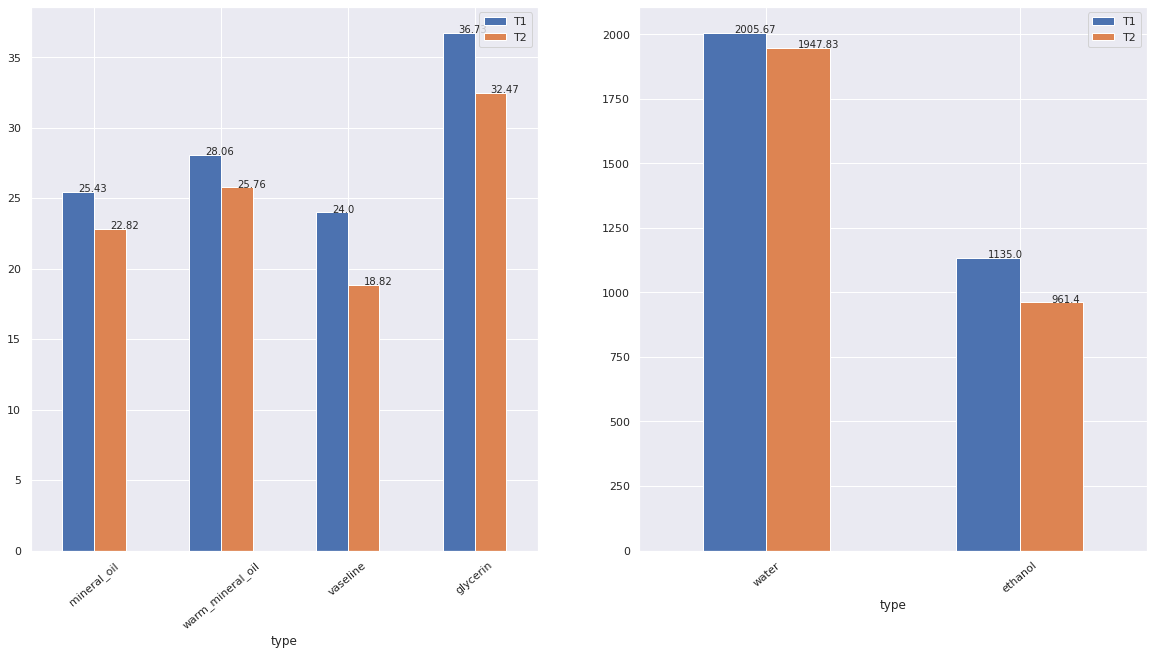

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
df1[0:4].plot.bar(x = 'type', y = ['T1', 'T2'], rot = 40, ax = axes[0])
df1[4:6].plot.bar(x = 'type', y = ['T1', 'T2'], rot = 40, ax = axes[1])

for ax in axes:
    for p in ax.patches: 
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))



Data For Experiment 2

In [128]:
file = "./Data/experiment2.csv"
df2 = pd.read_csv(file)

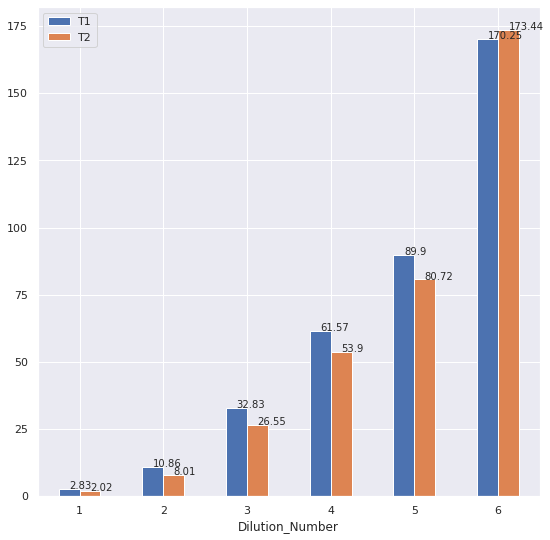

In [201]:
fig, ax = plt.subplots(figsize=(9,9))
df2.plot.bar(x = 'Dilution_Number', y = ['T1', 'T2'], rot = 0,  ax = ax)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

Data For Experiment 3

In [130]:
#df3 = read.csv("") #experiment 3

Data For Experiment 4

In [131]:
#df4 = read.csv("") #experiment 4

## Experiment 2

### Massage the collected data

Convert the measured half-life times to $T_1$ and $T_2$ values, and convert the **Dilution number** to concentration.

Each **Dilution number** represents a dilution by a factor of 4 (i.e., one drop of solution mixed with 3 drops of pure water).  So of the original concentration is $C_0$, the first dilution is $C_0/4$ the second dilution is $C_0/4^2$, and in general the $n\,$th dilution is $C_0/4^n$.

The compound used in solution is Cupric Sulfate, 5-Hydrate (CuSO<sub>4</sub>$\cdot$5H<sub>2</sub>O) which has a formula weight of 249.68 g/mol and a slubility of 32 g/100ml of water at 20C.  Calculate the concentration in molarity (mol/liter) of the copper ions.

In [132]:
def find_concentration(dilution_number, solubility = 32 * u.g/u.ml, molecular_weight = 249.68 * u.g/u.mol):
    C_0 = (solubility/molecular_weight).to(u.mol/u.l)
    Cu_concentration = C_0/(4**dilution_number)
    return Cu_concentration


In [133]:
df2["Concentration"] = find_concentration(dilution_number).value

### Plot it

Make a plot that shows the relationship as a line (or close to it), by adjusting the axis types used to make the plot.

To see how to change the axis types, look here: [pyplot.xscale()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html#matplotlib.pyplot.xscale)

In [213]:
t2_fit = stat.linregress(y=np.log10(df2["T2"]), x=np.log10(df2["Concentration"]))
t2_fit

In [216]:
t1_fit = stat.linregress(y=np.log10(df2["T1"]), x=np.log10(df2["Concentration"]))
t1_fit

LinregressResult(slope=-0.5659194768238416, intercept=1.8373081994272416, rvalue=-0.9745145393193948, pvalue=0.0009659865448584657, stderr=0.06513474759411739, intercept_stderr=0.07762708513383897)

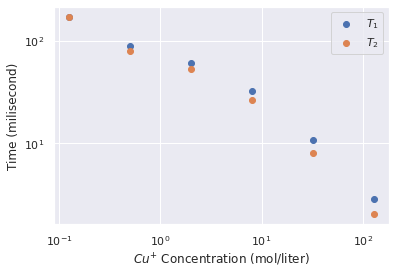

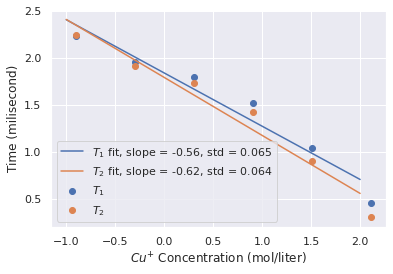

In [217]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df2["Concentration"], df2["T1"], label=r"$T_1$")
ax.scatter(df2["Concentration"], df2["T2"], label=r"$T_2$")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$Cu^{+}$ Concentration (mol/liter)")
ax.set_ylabel(r"Time (milisecond)")

plt.legend()

fig, ax = plt.subplots(1, 1)
ax.scatter(np.log10(df2["Concentration"]), np.log10(df2["T1"]), label=r"$T_1$")
ax.scatter(np.log10(df2["Concentration"]), np.log10(df2["T2"]), label=r"$T_2$")

x = np.linspace(-1, 2, 100)
ax.plot(x, t1_fit.slope*x + t1_fit.intercept, label=r"$T_1$ fit, slope = -0.56, std = 0.065 ")
ax.plot(x, t2_fit.slope*x + t2_fit.intercept, label=r"$T_2$ fit, slope = -0.62, std = 0.064")

ax.set_xlabel(r"$Cu^{+}$ Concentration (mol/liter)")
ax.set_ylabel(r"Time (milisecond)")

plt.legend()



## Experiment 3: diffusion study

### Massage the collected data

Rescale the **Delay_time** data to give the echo-position time.

In [191]:
delay_time = np.arange(0.4, 2.5, 0.4) #ms
initial_height = np.array([1.85,1.80,1.77, 1.85,1.95,1.75]) #V
echo_height = np.array([2.2, 1.9, 1.8, 2.3,2.3, 1.87]) #V
echo_time = np.array([800, 1600, 2400, 3200, 4000, 4800])# μs 

### Plot it

Plot the echo peak voltage vs. echo-position time.

Text(0, 0.5, 'echo height (V)')

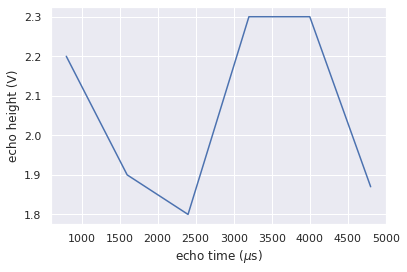

In [196]:
fig, ax = plt.subplots()
ax.plot(echo_time, echo_height)
ax.set_xlabel(r"echo time ($\mu$s)")
ax.set_ylabel("echo height (V)")

###  Fit it

Use the LMFit Model class to fit the data to equation (15) in the instructions.  In this data set the number of pulses between the first FID and the echo, $n=1$.  In your fit function, set the value of $T_2$ to be a constant (not a parameter that is adjustable by the fit), and set it to the $T_2$ value obtained for pure water.

Hint: to estimate a starting value for $K$, calculate the value of the function for the time $t$ at which it is half the height it is at $t=0$.  This is like a "half-life" even though the decay is not a simple exponential.

In [193]:
## Define the fit function
T2 = 1947.83 # ms 
def curve(Vi, t, K):
    V_peak = Vi * np.exp(-t/1947.83) * np.exp(-K*t**3/1**2) 
    return V_peak

## pull in the Model class and set up the fit

from scipy.optimize import curve_fit

## Fit and plot

X = (initial_height.tolist(), echo_time.tolist())
popt, pcov = curve_fit(curve, X, echo_height.tolist())




ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

### Optional: Estimate the self-diffusion constant of water

According to equation (16) in the instructions, 

$$ K = \frac{\gamma^2}{12}\left(\frac{\partial B_0}{\partial z}\right)^2 D$$

and $\gamma\Delta B_0 = \Delta\omega_0$, the spread of precession frequencies that determines $T_2^*$.  From this information and the width of the simple free induction decay, you can use the result for $K$ to estimate $D$ the diffusion constant for water (at room temperature).

Try this, and compare your result against Hahn's: [Hahn, E. L., "Spin echoes", Phys. Rev., 80, 580-594 (1950)](http://courses.washington.edu/phys431/restricted/Hahn_PR80.pdf), p. 589.